In [16]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [10]:
d = pd.read_csv("dummy_data.csv")
df = d[["time_spent", "age", "interests", "profession", "income", "isHomeOwner"]] #culled non-predictive features
df["interests"] = preprocessing.LabelEncoder().fit(["Sports", "Travel", "Lifestlye"]).transform(df["interests"])
df["profession"] = preprocessing.LabelEncoder().fit(["Student", "Software Engineer", "Marketer Manager"]).transform(df["profession"]) #these throw harmless warnings.
df["isHomeOwner"] = preprocessing.LabelEncoder().fit(["False", "True"]).transform(df["isHomeOwner"])
X = df[["time_spent", "age", "interests", "profession", "income", "isHomeOwner"]].values.astype(float) 
features = ["time_spent", "age", "interests", "profession", "income", "isHomeOwner"]
v = df[features]
v = pd.DataFrame(preprocessing.StandardScaler().fit(v).transform(v))
v.columns = features

/var/folders/np/wt2f_g3s42g_nygnmnbpcswr0000gn/T/ipykernel_45300/750096123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["interests"] = preprocessing.LabelEncoder().fit(["Sports", "Travel", "Lifestlye"]).transform(df["interests"])
/var/folders/np/wt2f_g3s42g_nygnmnbpcswr0000gn/T/ipykernel_45300/750096123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["profession"] = preprocessing.LabelEncoder().fit(["Student", "Software Engineer", "Marketer Manager"]).transform(df["profession"]) #these thro

In [11]:
#inspect our dataframe
v.head()

,time_spent,age,interests,profession,income,isHomeOwner
0,-0.799901,1.112882,0.015896,0.056541,1.609380,-1.016130
1,-1.194135,0.371652,1.238658,1.285703,-1.505106,0.984126
2,1.171269,-0.666069,0.015896,-1.172620,-0.594094,-1.016130
3,-0.011433,1.409373,1.238658,1.285703,-0.850422,0.984126
4,-1.588369,-1.184929,-1.206866,0.056541,-0.151776,0.984126


In [34]:
acc_list = []
for n in range(2, 60):
    m = KMeans(init = "k-means++", n_clusters = n, n_init = 20).fit(v)
    labels = m.labels_
    #we use the shilouhette score to determine the best n
    acc_list.append(silhouette_score(v, labels, metric = 'euclidean'))
a_l_vals = np.array(acc_list)

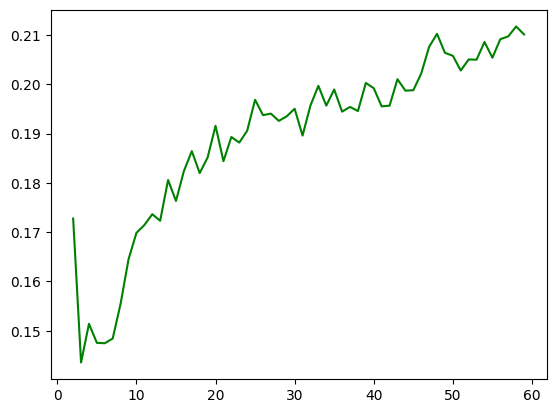

In [35]:
plt.plot(range(2,60),a_l_vals,'g')
plt.show()


In [ ]:
#This graph means that aside from 2, there is no good number of k-clusters--
#that is, that even K-means can't find anything useful in the data